## Topic: Features Engineering

### OUTCOMES

- 1. Introduction of Features Engineering

- 2. Polynomial Transformation

- 3. Binning Transformation

- 4. Domain-driven risk Transformation

## 1. Introduction of Features Engineering


- Definition:
    - Feature Engineering is the process of using domain knowledge to extract features from raw data.

    - A technique by which can boost Model Performance.

- Features Transformation 
    - 1. Missing Value Imputation.

    - 2. Handling Categorical Features.

    - 3. Outliers Detection and handling.

    - 4. Polynomial Transformation

    - 5. Handling Numerical Features.

    - 6. Feature Scaling.

- we already completed (1-3). now we move to (4-5) in this file

In [1]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


In [2]:
# 0.1 Load the Dataset and Inspect

df = pd.read_csv("heart.csv") 

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe().T)

Shape of dataset: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Describe (numeric columns):


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


### Part A: Exploratory Data Analysis (EDA)

In [5]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())


Unique values per column:
Age : 50
Sex : 2
ChestPainType : 4
RestingBP : 67
Cholesterol : 222
FastingBS : 2
RestingECG : 3
MaxHR : 119
ExerciseAngina : 2
Oldpeak : 53
ST_Slope : 3
HeartDisease : 2


- 1. Numerical Columns
    - [Age, RestingBP, Cholesterol,  MaxHR, Oldpeak]
    

- 2. Categorical Columns
    - [ Sex,  ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope ]


- 3. Target Columns
    - [ HeartDisease ]


In [3]:
numeric_cols = ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"]

cat_cols = [ "Sex",  "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope" ]

target_cols = 'HeartDisease'



In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### 2. Univariate Analysis

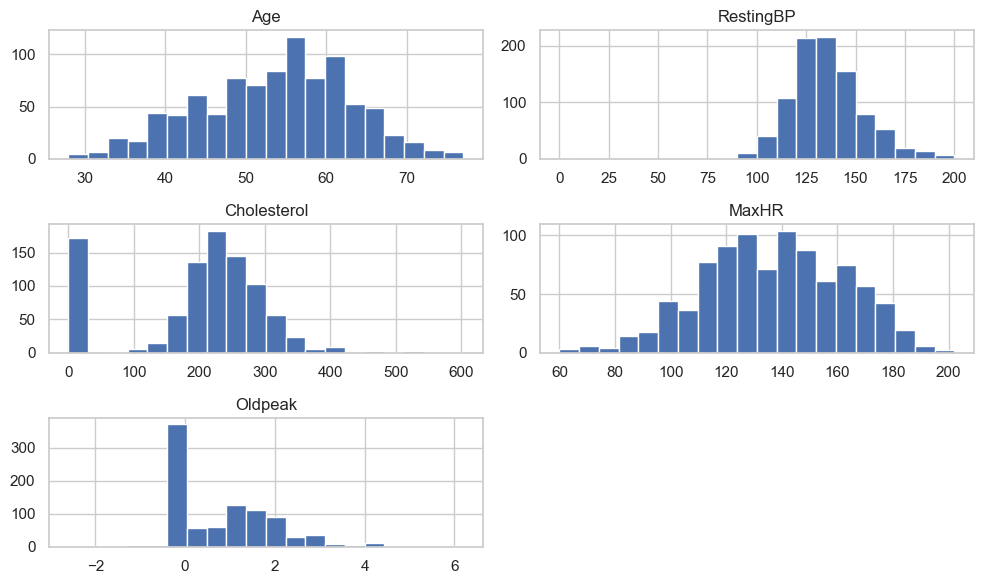

In [5]:
# 2. Univariate Analysis

numeric_cols = ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"]

# Histograms 
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()


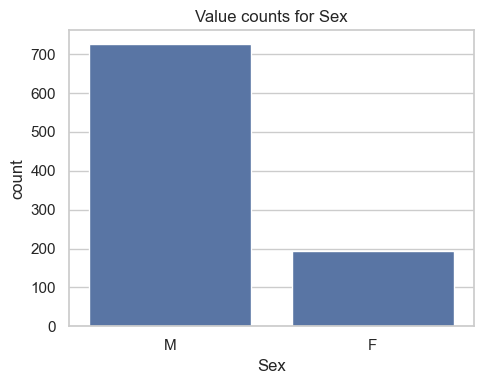

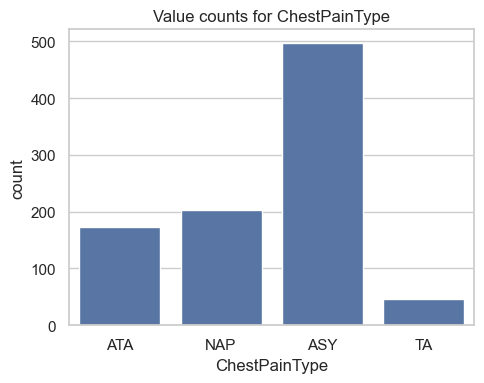

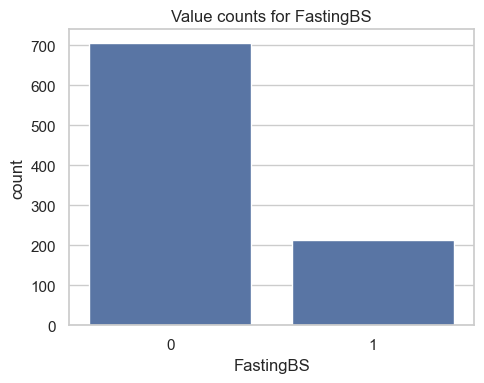

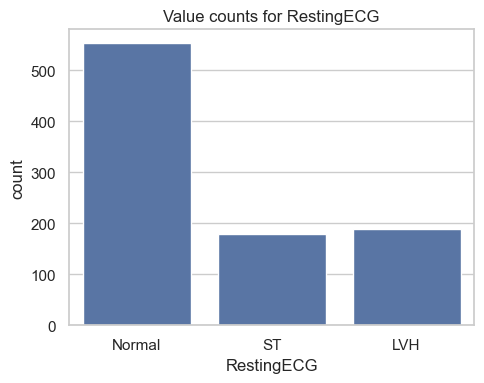

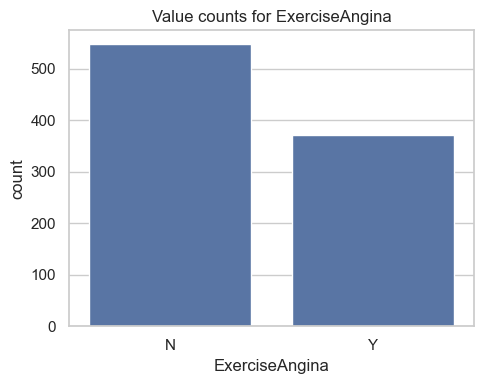

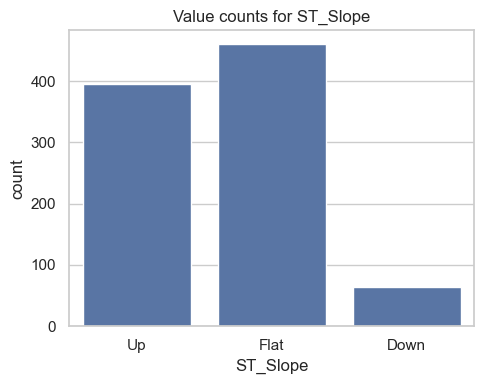

In [6]:
# Write Countplots code for key categorical variables
cat_cols = [ "Sex",  "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope" ]

for c in cat_cols:

    plt.figure(figsize = (5,4))

    # df[c].value_counts().plot(kind = 'bar')

    sns.countplot(data=df, x = df[c])


    plt.title(f"Value counts for {c}")

    plt.ylabel("count")

    plt.xticks(rotation = 0) # [Default - 90]

    plt.tight_layout()

    plt.show()


### 3. Bivariate Analysis Numerical columns with Target 

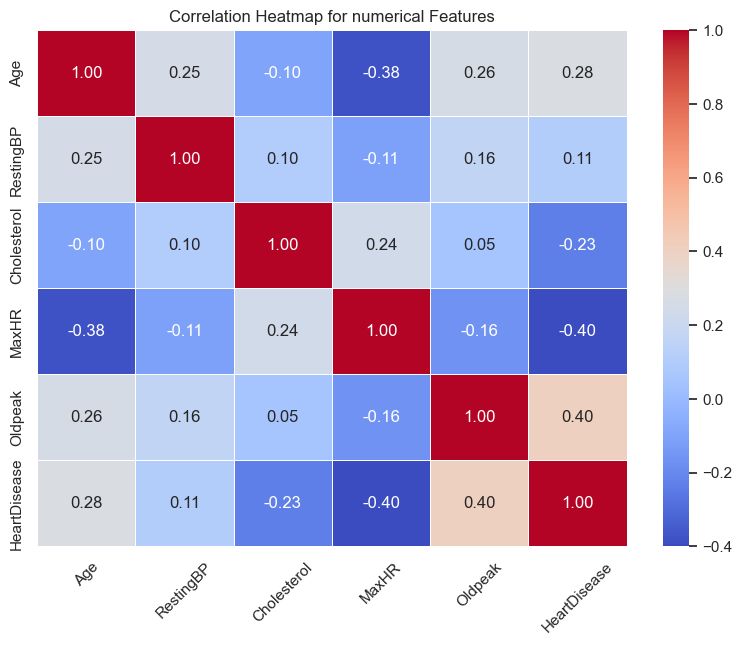

In [7]:
# numeric_cols = ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"]

target_cols = 'HeartDisease'

corr_matrix = df[numeric_cols + [target_cols]].corr()

plt.figure(figsize = (8,6))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)

plt.title("Correlation Heatmap for numerical Features")

plt.tight_layout()
plt.xticks(rotation = 45) # 90 default

plt.show()

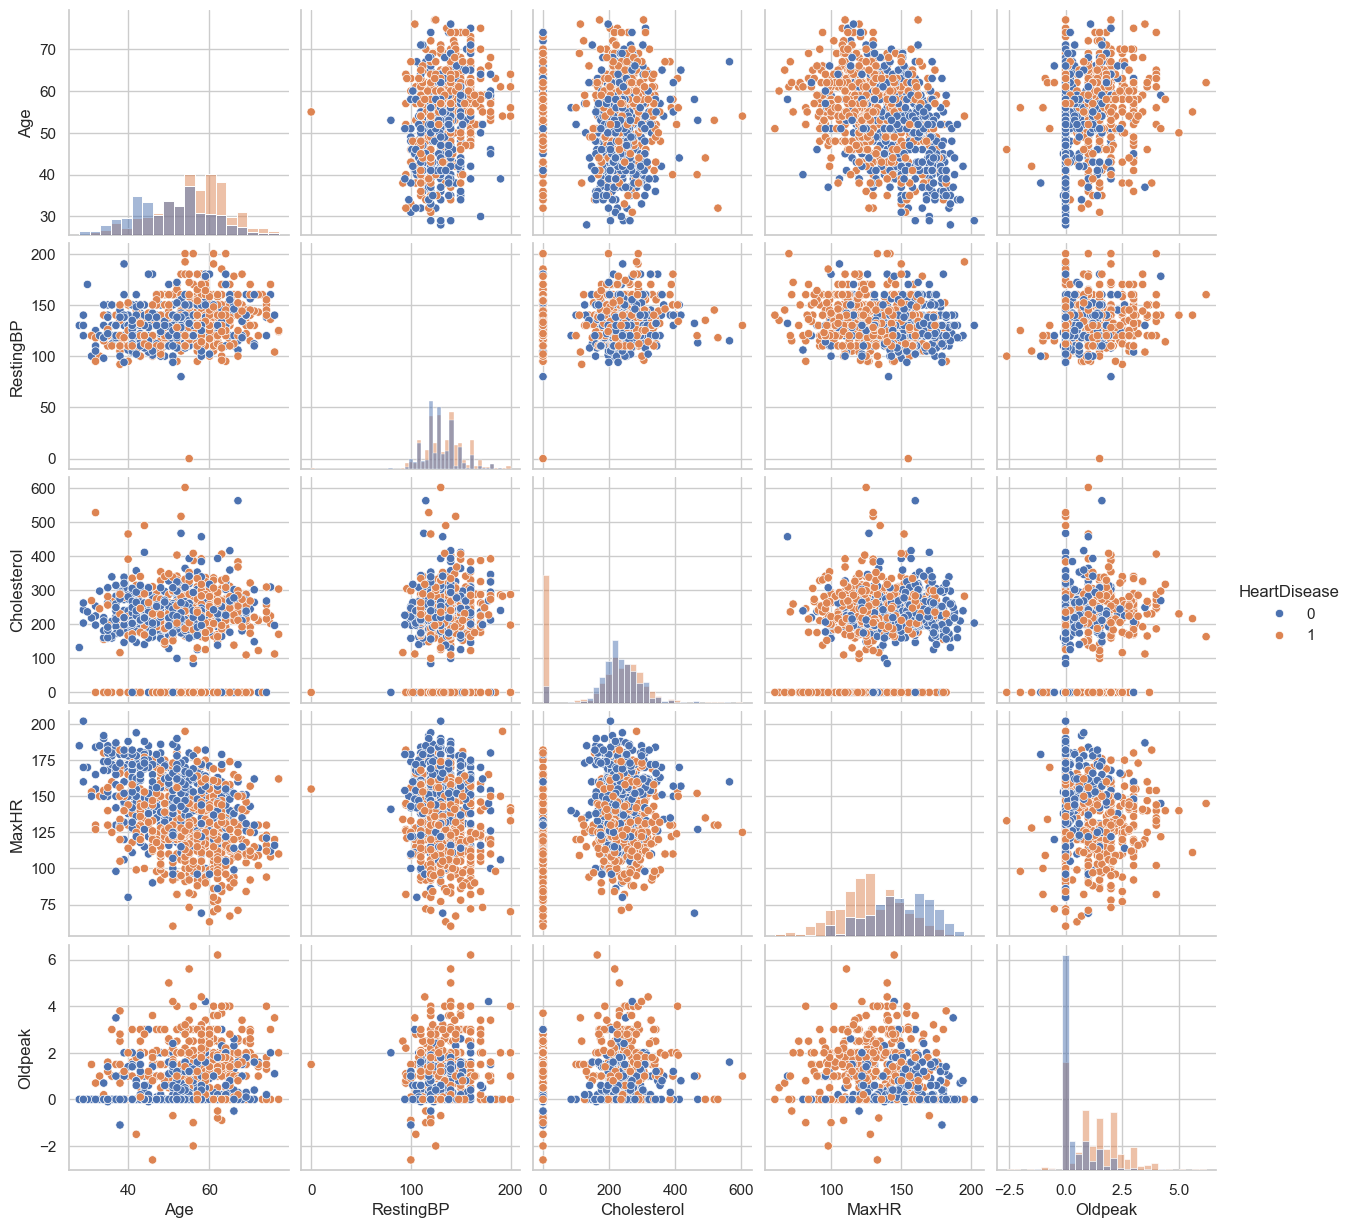

In [8]:
# Create a pairplot for:-> ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak", "HeartDisease"]

# Pairplot for numerical columns (To see the correlation between each features)

sns.pairplot(df[ ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak", "HeartDisease"]], hue = 'HeartDisease', diag_kind = 'hist')


plt.show()

### 4. Categorical vs Target Analysis

\HeartDisease proportion by Sex:


HeartDisease,0,1
Sex,,
F,0.740933,0.259067
M,0.368276,0.631724


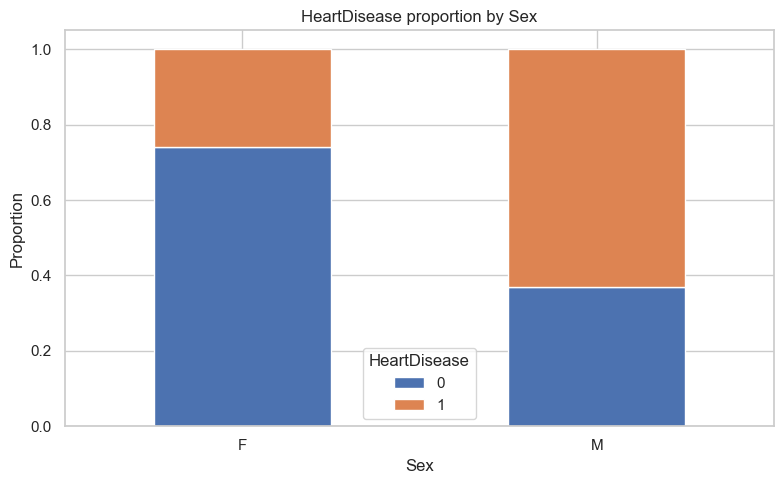

\HeartDisease proportion by ChestPainType:


HeartDisease,0,1
ChestPainType,,
ASY,0.209677,0.790323
ATA,0.861272,0.138728
NAP,0.645320,0.354680
TA,0.565217,0.434783


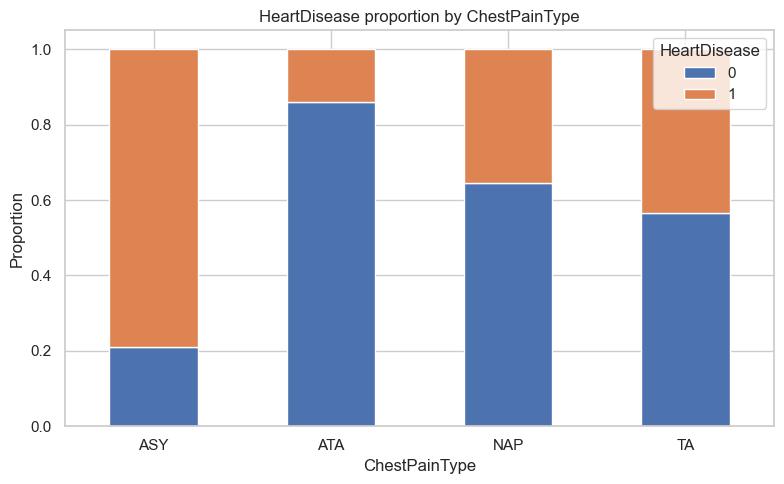

\HeartDisease proportion by FastingBS:


HeartDisease,0,1
FastingBS,,
0,0.519886,0.480114
1,0.205607,0.794393


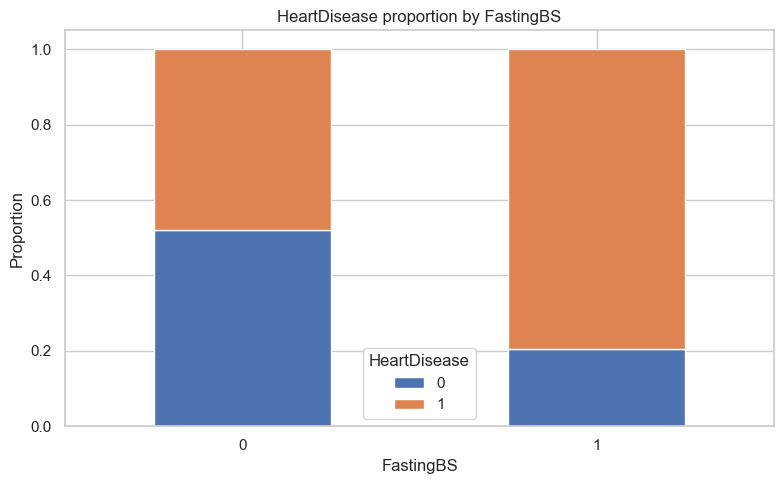

\HeartDisease proportion by RestingECG:


HeartDisease,0,1
RestingECG,,
LVH,0.436170,0.563830
Normal,0.483696,0.516304
ST,0.342697,0.657303


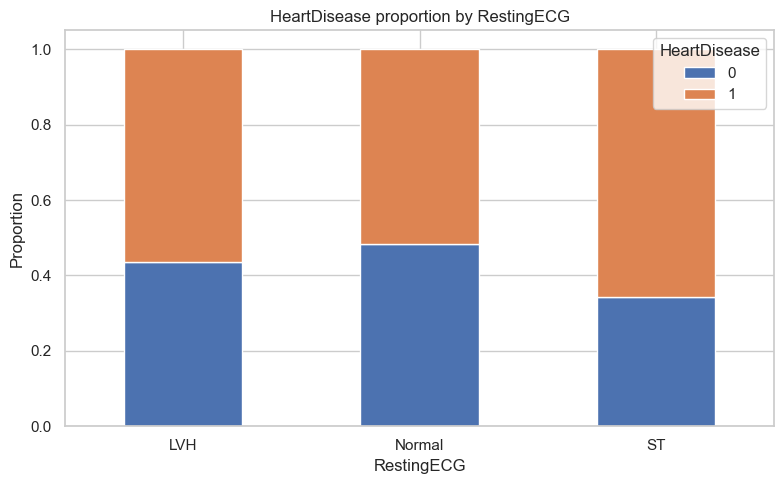

\HeartDisease proportion by ExerciseAngina:


HeartDisease,0,1
ExerciseAngina,,
N,0.648995,0.351005
Y,0.148248,0.851752


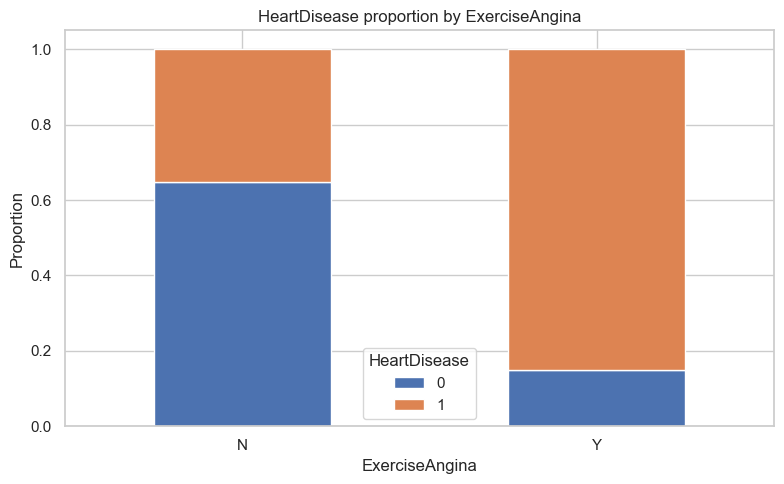

\HeartDisease proportion by ST_Slope:


HeartDisease,0,1
ST_Slope,,
Down,0.222222,0.777778
Flat,0.171739,0.828261
Up,0.802532,0.197468


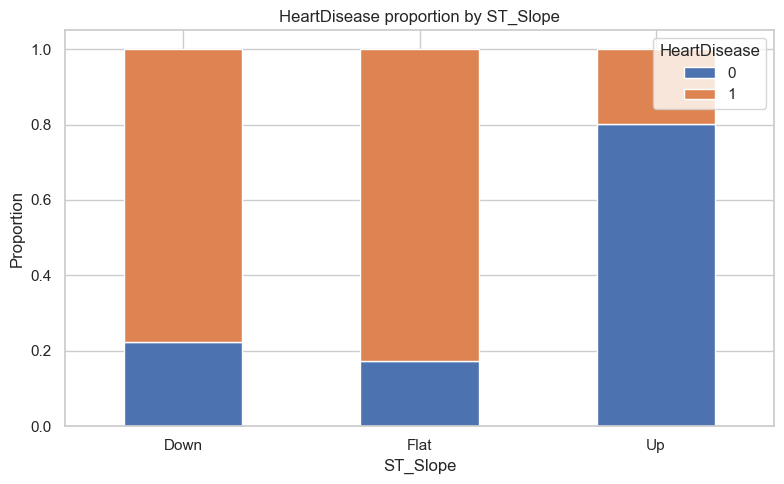

In [9]:
# 4. Categorical vs Target Analysis [Bar chart]

cat_target_cols = cat_cols = [ "Sex",  "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope" ]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["HeartDisease"], normalize="index")
    print(f"\HeartDisease proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True)
    plt.title(f"HeartDisease proportion by {c}")
    plt.ylabel("Proportion")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


### Part B_I: Basic Data Preprocessing 

- Focus: **Handling missing values, encoding categorical variables.**

In [10]:
# 5. Handling Missing Values

print("Missing values before:") 
print(df.isna().sum())

print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Missing values after handling:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


- in this datapoints there is no outliers

---
### 6. Encoding Categorical Variables
Focus on the following categorical features:

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.


In [21]:
df.shape

(918, 12)

In [11]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones

numeric_cols = ["Age", "RestingBP", "Cholesterol",  "MaxHR", "Oldpeak"]

cat_cols = [ "Sex",  "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope" ]

target_cols = 'HeartDisease'



# One hot encode categorical variables [You need to do]
encoded_df = pd.get_dummies(
    df,
    columns = cat_cols,
    dtype=int
)

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_cols] + numeric_cols],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (918, 28)


,HeartDisease,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Age,RestingBP,Cholesterol,MaxHR,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,40,140,289,172,0.0,40,140,289,172,...,1,0,0,1,0,1,0,0,0,1
1,1,49,160,180,156,1.0,49,160,180,156,...,1,0,0,1,0,1,0,0,1,0
2,0,37,130,283,98,0.0,37,130,283,98,...,1,0,0,0,1,1,0,0,0,1
3,1,48,138,214,108,1.5,48,138,214,108,...,1,0,0,1,0,0,1,0,1,0
4,0,54,150,195,122,0.0,54,150,195,122,...,1,0,0,1,0,1,0,0,0,1


In [12]:
print(encoded_df.head())

encoded_df.dtypes

   Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0   40        140          289    172      0.0             0      0      1   
1   49        160          180    156      1.0             1      1      0   
2   37        130          283     98      0.0             0      0      1   
3   48        138          214    108      1.5             1      1      0   
4   54        150          195    122      0.0             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
0                  0                  1  ...            1            0   
1                  0                  0  ...            1            0   
2                  0                  1  ...            1            0   
3                  1                  0  ...            1            0   
4                  0                  0  ...            1            0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0            

Age                    int64
RestingBP              int64
Cholesterol            int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_F                  int64
Sex_M                  int64
ChestPainType_ASY      int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
FastingBS_0            int64
FastingBS_1            int64
RestingECG_LVH         int64
RestingECG_Normal      int64
RestingECG_ST          int64
ExerciseAngina_N       int64
ExerciseAngina_Y       int64
ST_Slope_Down          int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
dtype: object

### Part-B_II : Advance PreProcessing

- Outliers detection

    - Visualize outliers with boxplot

    - Use IQR Method to detect or identify the outliers


- Outliers Handling

    - Method_1: Remove outliers
    
    - Method_2: Cap outliers

    - Method_3: log transforms

### 2. Visualize Outliers with boxplot

In [13]:
# dataset look like:
encoded_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [14]:
# after scaling the actual numerical cols

numeric_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

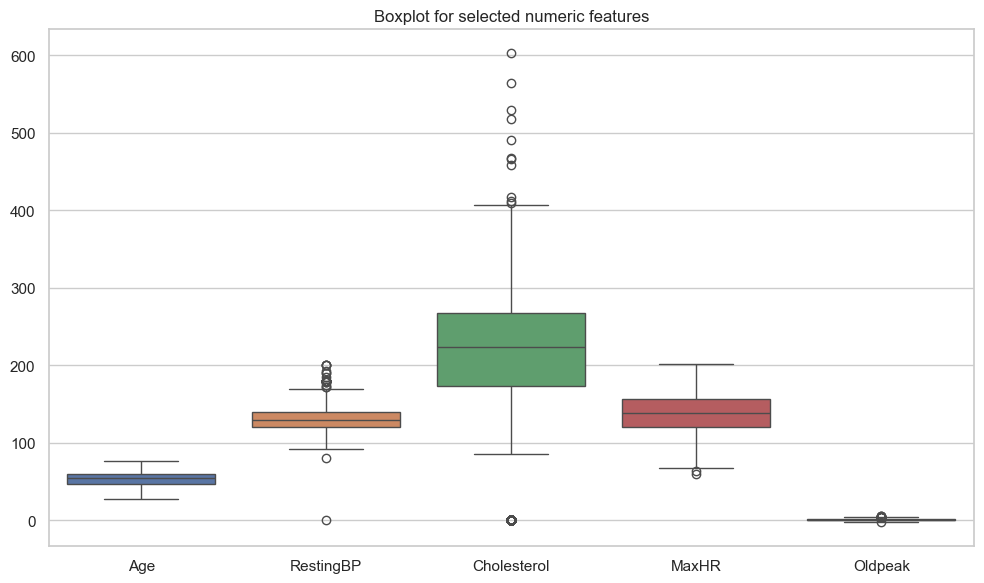

In [15]:
plt.figure(figsize=(10,6))

sns.boxplot(data = encoded_df[numeric_cols])

plt.title("Boxplot for selected numeric features")


plt.tight_layout()

plt.show()

- What Happen above plot?
    - Age columns -> no outliers

    - ResgingBP -> some outliers

    - Cholesterol -> Huge outliers

    - MaxHR  -> smaller outliers

    - oldpeak -> minimum outliers

### 3. Use the IQR Method to detect(identify) outliers

- If data < Lower Limit  => Outlier  
- If data > Upper Limit  => Outlier

In [16]:
col = 'Cholesterol' # <- this Cholesterol column how many outliers

Q1 = encoded_df[col].quantile(0.25)

Q3 = encoded_df[col].quantile(0.75) 

IQR = Q3 - Q1  # [middle 50 % data]

lower = Q1 - 1.5 * IQR # [- lower range for non-outliers]

upper = Q3 + 1.5 * IQR # [- upper range for non-outliers]


outliers = encoded_df[
    (encoded_df[col] < lower) |
    (encoded_df[col] > upper)    
    ]
 
print(f"Q1(25% ) data: {Q1}")
print(f"Q3(50% ) data: {Q3}")

print(f"IQR(Middle 50%): {IQR}")

print("Lower Range for outlier: ", lower)
print("Upper Range for outliers: ", upper)


print(f"Outlier of {encoded_df[col]} are : \n {outliers[col]}")

print(f"Number of detected outliers in {col}: ", len(outliers))


Q1(25% ) data: 173.25
Q3(50% ) data: 267.0
IQR(Middle 50%): 93.75
Lower Range for outlier:  32.625
Upper Range for outliers:  407.625
Outlier of 0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64 are : 
 28     468
30     518
69     412
76     529
103    466
      ... 
535      0
536      0
616    564
667    417
796    409
Name: Cholesterol, Length: 183, dtype: int64
Number of detected outliers in Cholesterol:  183


- Conclusion:
    - Cholesterol column total outliers : 183

### 4. Remove outliers and it's appropriate use (1st way to Heandling outliers) 


- When To use this first method : Remove outliers?
    - Dataset is large
    - outliers are not meaningful

- Disadvantages?
    - Dangerous for small datasets

In [17]:
# No outlier in specific column(Cholesterol)

df_no_outliers = encoded_df[
    (encoded_df[col] >= lower) &
    (encoded_df[col] <= upper)
    ]

print(f"Total numbers of Not outliers (Remove outliers) for {col} column are: ", len(df_no_outliers))

Total numbers of Not outliers (Remove outliers) for Cholesterol column are:  735


In [18]:
# Total cholesterol data points
len(encoded_df['Cholesterol'])

918

- Conclusion:
    - for Cholesterol column total data point are: 918

    - Cholesterol column total outliers : 183 

    - Not outliers : 735


###  5. Cap Outliers and it's appropriae use case senerio (2nd way to Heandling outliers)


- Replace outliers with theshold values

    - datapoint < lower limit => replace with lower limit

    - datapoints > upper limit => replace with upper limit

- When to use?
    - oultliers are valid but extreme

- Disadvantages
    - 1. Distorts the original data distribution

    - 2. May introduce bias

In [19]:
# handling outliers using cap method

# col = "Cholesterol"

df_capped = encoded_df.copy()

df_capped[col] = df_capped[col].clip(lower, upper)

# Lower Range for Cholesterol col:  32.625
# Upper Range for Cholesterol col:  407.625

In [20]:
# after capping the datapoints of Cholesterol column
print(encoded_df.sample(8))

     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
457   40        125            0    165      0.0             1      0      1   
170   29        120          243    160      0.0             0      0      1   
143   53        140          243    155      0.0             0      0      1   
829   29        130          204    202      0.0             0      0      1   
490   72        120          214    102      1.0             1      0      1   
505   55        136          245    131      1.2             1      0      1   
201   46        120          230    150      0.0             0      0      1   
614   62        120          254     93      0.0             1      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
457                  1                  0  ...            0            1   
170                  0                  1  ...            1            0   
143                  1                  0  ...     

In [21]:
# before capping the data points of Cholesterol column
print(df_capped.sample(8))

     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
826   51        125      245.000    166      2.4             0      0      1   
351   43        140       32.625    140      0.5             1      0      1   
346   59        120       32.625    115      0.0             1      0      1   
816   58        125      300.000    171      0.0             1      0      1   
240   55        145      326.000    155      0.0             0      0      1   
678   60        150      240.000    171      0.9             0      1      0   
279   54        130      253.000    155      0.0             0      1      0   
165   46        140      272.000    175      2.0             1      0      1   

     ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
826                  0                  0  ...            0            1   
351                  1                  0  ...            1            0   
346                  1                  0  ...     

In [22]:
# after capping the datapoints of Cholesterol column
print("After capping the data points: ", encoded_df[col].iloc[386]) # index: 386

# before capping the data points of Cholesterol column
print("Before cappint the datapoints: ",df_capped[col].iloc[386])

After capping the data points:  0
Before cappint the datapoints:  32.625


### 6. log transform the column (3th way to handling outliers)

- Purpose:
    - Log transform reduces skewness and compresses extreme values in a suitable range.

- When to use?
    - When keeping outliers but reducing impact.
    - when data is skewed.
    - useful for salary, income, price, population etc.

In [23]:
# outlier heandling using log transform

df_log = encoded_df.copy()

df_log[col + '_log'] = np.log(df_log[col] + 1)

print(f"After log transform {col} column data points are: ", df_log)

After log transform Cholesterol column data points are:       Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0     40        140          289    172      0.0             0      0      1   
1     49        160          180    156      1.0             1      1      0   
2     37        130          283     98      0.0             0      0      1   
3     48        138          214    108      1.5             1      1      0   
4     54        150          195    122      0.0             0      0      1   
..   ...        ...          ...    ...      ...           ...    ...    ...   
913   45        110          264    132      1.2             1      0      1   
914   68        144          193    141      3.4             1      0      1   
915   57        130          131    115      1.2             1      0      1   
916   57        130          236    174      0.0             1      1      0   
917   38        138          175    173      0.0             0 

In [24]:
df_log['Cholesterol_log']

0      5.669881
1      5.198497
2      5.648974
3      5.370638
4      5.278115
         ...   
913    5.579730
914    5.267858
915    4.882802
916    5.468060
917    5.170484
Name: Cholesterol_log, Length: 918, dtype: float64

- why use np.log(df_log[col] + 1)?

    - if col contain 0 then
    
    - np.log(0) => infinite (so, infinite are misleading the model)

    - so, reduce the infinite problem use + 1.


- Conclusion:
    - 1. Removal method:
        - Apply when dataset are large.

    
    - 2. Capping Method:
        - when dataset are valid

    - 3. log transform:
        - when dataset are  Skewed

## 2. Polynomial Transformation

- Combination of two or more features and find the relationship between them if the combine relationship gives better insight then we keep thise features and drop rest of features.

- Why use Polynomial Transformation?
    - It helps to find Non-linear relationship between features.

    - eg: 
        - house vs size
        - height vs weight
        - salary vs experience

- we have two features (x, y) 

- Case_01: Apply Polynomial Transformation with degree = 2 also include bias terms then how looks features?

- original features = [x,y]
         |
         V
    - apply Polynomial transformation

- transforms features [1, x,y,x2, x.y, y2] 

    - for bias terms  => 1 feature
    - for degree 2 => square structure
    - degree 2 means => U-curve shape



- Case_02: Apply Polynomial Transformation where degree = 3 also and without include bias terms then how looks features?

- After transforms features [x,y,x2, x.y, y2, x3, x2.y, x.y2, y3] 

- Note:
    - if x feature is less insight x2 then keep the x2 and drop the x feature.
    - that is the purpose of Polynomial transformation

In [28]:
encoded_df.head(1)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1


In [35]:
# code Implementation of Polynomial Transformation
from sklearn.preprocessing import PolynomialFeatures

# Age, MaxHR (using this two features to see the relationship)

poly_cols = ["Age", "MaxHR"]

poly = PolynomialFeatures(degree=2,include_bias=False)

poly_features = poly.fit_transform(encoded_df[poly_cols])

poly_features_names = poly.get_feature_names_out(poly_cols)

# print(poly_features)

print(poly_features_names)

print(len(poly_features_names))



['Age' 'MaxHR' 'Age^2' 'Age MaxHR' 'MaxHR^2']
5


## 3. Binning Transformation

## 4. Domain-driven risk Transformation